# 필요한 라이브러리 로드 

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [9]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 딥러닝


Epoch 00001: val_loss improved from inf to 0.14749, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00002: val_loss improved from 0.14749 to 0.10239, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00003: val_loss improved from 0.10239 to 0.08909, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00004: val_loss improved from 0.08909 to 0.07719, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00005: val_loss improved from 0.07719 to 0.07226, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00006: val_loss improved from 0.07226 to 0.06762, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00007: val_loss improved from 0.06762 to 0.06541, saving model to ./model/
INFO:tensorflow:Assets written to: ./model/assets

Epoch 00008: val_loss improved from 0.06541 to 0.06152, saving model to ./model

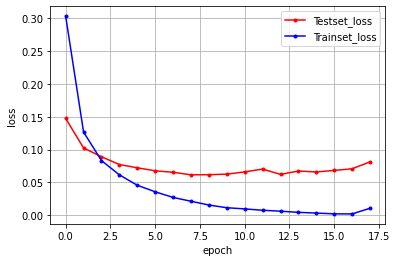

In [14]:
# MNIST데이터 불러오기 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

# 모델 프레임설정
# 은닉층  - 512개
# input_dim - 입력값 784
model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행환경 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}- {val_loss:.4f}.hdfs"
checkpointer = ModelCheckpoint(filepath=MODEL_DIR, monitor='val_loss',verbose = 1, save_best_only=True)  
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, 
                    batch_size=200, 
                    verbose = 0, 
                    callbacks=[early_stopping_callback, checkpointer]
                    )
#테스트 정확도 출력
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label='Trainset_loss')


#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 20번째 실행에서 멈추었으며, 베스트 모델은 19번째 모델
* 테스트 정확도 : 98.2 %